# This workbook offers an alternate approach to assigning values to categorized words

In contrast to assigning a value of 1 or 0 based on the non-zero values in the dataset, I'll apply a value based on the sum of non-zero values *divided* by total values in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
users = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/users.csv')
words = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/words.csv')
train = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/train.csv')

## Due to number of missing values in the words dataset, I'm going to categorize them into a smaller list of key words:

- **Edgy**:
'Aggressive', 'Edgy', 'Noisy', 'Rebellious'

- **Chill**:
'Laid back', 'Calm', 'Relaxed', 'Worldly', 'Background', 'Way out'

- **Playful**:
'Uplifting', 'Colourful', 'Youthful', 'Outgoing', 'Exciting', 'Energetic', 'Fun', 'Cool', 'Free', 'Upbeat', 'Catchy', 'Playful', 'Sociable'

- **Dark**
'Dark', 'Depressing', 'Serious'

- **Negative**:
'Unattractive', 'Annoying', 'Fake', 'Boring', 'Uninspired', 'Superficial', 'Arrogant', 'Unapproachable', 'Unoriginal', 'Intrusive', 'Not authentic', 'Cheap', 'Irrelevant', 'Cheesy'

- **Sensitive**:
'Relatable', 'Nostalgic', 'Warm', 'Authentic', 'Thoughtful', 'Passionate', 'Sensitive', 'Beautiful', 'Heartfelt', 'Emotional', 'Wholesome', 'Soulful', 'Inspiring', 'Good_Lyrics'

- **Mainstream**:
'Current', 'Mainstream', 'Popular', 'Approachable'

- **Iconic**
'Pioneer', 'Timeless', 'Genius', 'Iconic', 'Classic', 'Legendary', 'Superstar', 'Original', 'Credible', 'Sophisticated'

- **Stylish**:
'Stylish', 'Trendsetter', 'Progressive', 'Intriguing', 'Sexy', 'Talented', 'Distinctive', 'Confident', 'Outspoken'

- **Outdated**:
'Old', 'Dated', 'Over'

- **None of these**:
'None of these'


In [3]:
# Combine good lyrics
Good_Lyrics = []
zipped_lyrics = zip(list(words['Good lyrics']),list(words['Good Lyrics']))
for i in zipped_lyrics:
    if np.isnan(i[0]) == True:
        Good_Lyrics.append(i[1])
    else:
        Good_Lyrics.append(i[0])
words['Good_Lyrics']=pd.DataFrame(Good_Lyrics)
words = words.drop(labels=['Good lyrics', 'Good Lyrics'],axis=1)
words.columns

Index([u'Artist', u'User', u'HEARD_OF', u'OWN_ARTIST_MUSIC', u'LIKE_ARTIST',
       u'Uninspired', u'Sophisticated', u'Aggressive', u'Edgy', u'Sociable',
       u'Laid back', u'Wholesome', u'Uplifting', u'Intriguing', u'Legendary',
       u'Free', u'Thoughtful', u'Outspoken', u'Serious', u'Unattractive',
       u'Confident', u'Old', u'Youthful', u'Boring', u'Current', u'Colourful',
       u'Stylish', u'Cheap', u'Irrelevant', u'Heartfelt', u'Calm', u'Pioneer',
       u'Outgoing', u'Inspiring', u'Beautiful', u'Fun', u'Authentic',
       u'Credible', u'Way out', u'Cool', u'Catchy', u'Sensitive',
       u'Mainstream', u'Superficial', u'Annoying', u'Dark', u'Passionate',
       u'Not authentic', u'Background', u'Timeless', u'Depressing',
       u'Original', u'Talented', u'Worldly', u'Distinctive', u'Approachable',
       u'Genius', u'Trendsetter', u'Noisy', u'Upbeat', u'Relatable',
       u'Energetic', u'Exciting', u'Emotional', u'Nostalgic', u'None of these',
       u'Progressive', u'Sexy'

In [4]:
words = words.drop(labels='Unnamed: 87', axis=1)

In [5]:
word_categories = {'Edgy_':['Aggressive', 'Edgy', 'Noisy', 'Rebellious'],
                   'Chill_': ['Laid back', 'Calm', 'Relaxed', 'Worldly', 'Background', 'Way out'],
                   'Playful_': ['Uplifting', 'Colourful', 'Youthful', 'Outgoing', 'Exciting', 'Energetic', 'Fun',
                               'Cool', 'Free', 'Upbeat', 'Catchy', 'Playful', 'Sociable'],
                   'Dark_': ['Dark', 'Depressing', 'Serious'],
                   'Negative_': ['Unattractive', 'Annoying', 'Fake', 'Boring','Uninspired',
                                'Superficial', 'Arrogant', 'Unapproachable', 'Unoriginal',
                                'Intrusive', 'Not authentic', 'Cheap', 'Irrelevant', 'Cheesy'],
                   'Sensitive_': ['Relatable', 'Nostalgic', 'Warm', 'Authentic', 'Thoughtful',
                                 'Passionate', 'Sensitive', 'Beautiful','Heartfelt', 'Emotional', 
                                 'Wholesome', 'Soulful', 'Inspiring', 'Good_Lyrics'],
                   'Mainstream_': ['Current', 'Mainstream', 'Popular', 'Approachable'],
                   'Iconic_': ['Pioneer', 'Timeless', 'Genius', 'Iconic', 'Classic', 'Legendary',
                              'Superstar', 'Original', 'Credible', 'Sophisticated'],
                   'Stylish_': ['Stylish', 'Trendsetter', 'Progressive', 'Intriguing',
                               'Sexy','Talented', 'Distinctive', 'Confident', 'Outspoken'],
                   'Outdated_': ['Old', 'Dated', 'Over'],
                   'None_of_these_': ['None of these']}

In [6]:
words.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Good_Lyrics
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,0.0
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,0.0
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,0.0
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,0.0


In [7]:
word_categories.keys()

['Dark_',
 'Outdated_',
 'Stylish_',
 'Iconic_',
 'Negative_',
 'Mainstream_',
 'None_of_these_',
 'Sensitive_',
 'Playful_',
 'Chill_',
 'Edgy_']

In [8]:
edgy = words[word_categories['Edgy_']]
negative = words[word_categories['Negative_']]
sensitive = words[word_categories['Sensitive_']]
stylish = words[word_categories['Stylish_']]
dark = words[word_categories['Dark_']]
none = words[word_categories['None_of_these_']]
mainstream = words[word_categories['Mainstream_']]
iconic = words[word_categories['Iconic_']]
playful = words[word_categories['Playful_']]
outdated = words[word_categories['Outdated_']]
chill = words[word_categories['Chill_']]

In [9]:
words_categorized = words.ix[:,:5]
words_categorized['Edgy_'] = words[word_categories['Edgy_']].sum(axis=1)/words[word_categories['Edgy_']].count(axis=1)
words_categorized['Negative_'] = words[word_categories['Negative_']].sum(axis=1)/words[word_categories['Negative_']].count(axis=1)
words_categorized['Sensitive_'] = words[word_categories['Sensitive_']].sum(axis=1)/words[word_categories['Sensitive_']].count(axis=1)
words_categorized['Stylish_'] = words[word_categories['Stylish_']].sum(axis=1)/words[word_categories['Stylish_']].count(axis=1)
words_categorized['Dark_'] = words[word_categories['Dark_']].sum(axis=1)/words[word_categories['Dark_']].count(axis=1)
words_categorized['None_of_these_'] = words[word_categories['None_of_these_']].sum(axis=1)/words[word_categories['None_of_these_']].count(axis=1)
words_categorized['Mainstream_'] = words[word_categories['Mainstream_']].sum(axis=1)/words[word_categories['Mainstream_']].count(axis=1)
words_categorized['Iconic_'] = words[word_categories['Iconic_']].sum(axis=1)/words[word_categories['Iconic_']].count(axis=1)
words_categorized['Playful_'] = words[word_categories['Playful_']].sum(axis=1)/words[word_categories['Playful_']].count(axis=1)
words_categorized['Outdated_'] = words[word_categories['Outdated_']].sum(axis=1)/words[word_categories['Outdated_']].count(axis=1)
words_categorized['Chill_'] = words[word_categories['Chill_']].sum(axis=1)/words[word_categories['Chill_']].count(axis=1)

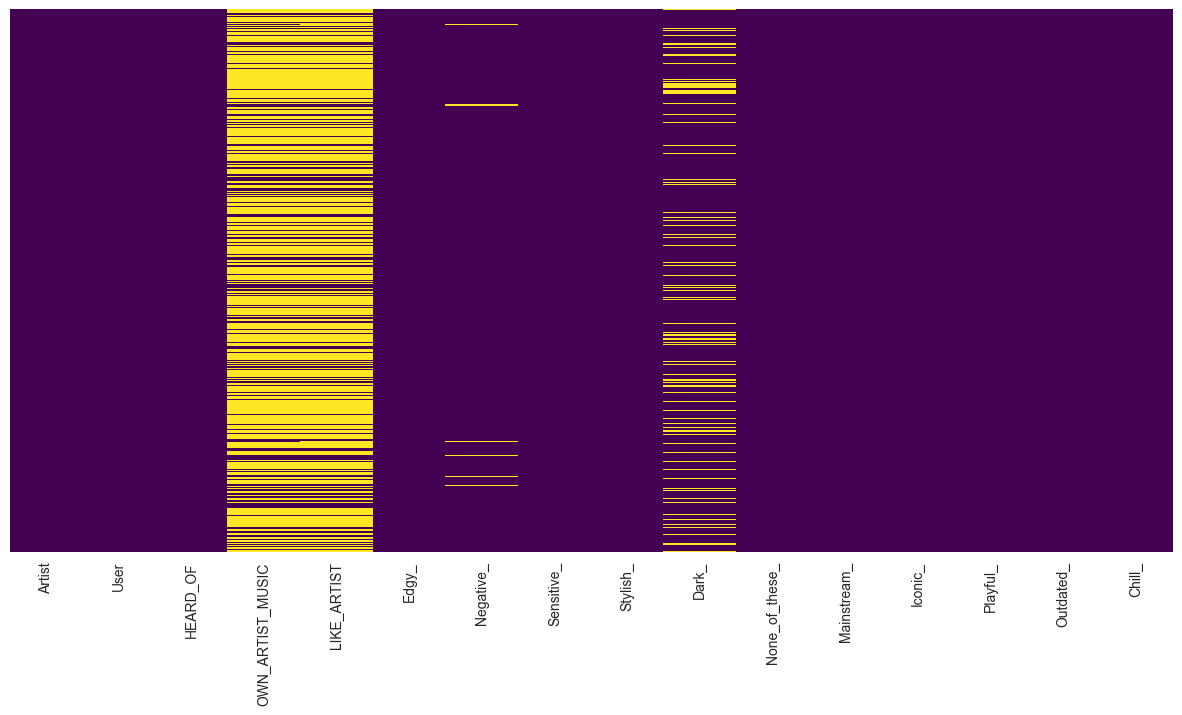

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(words_categorized.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [12]:
words_categorized = words_categorized.drop(['OWN_ARTIST_MUSIC','LIKE_ARTIST'],axis=1)

In [13]:
words_categorized

,Artist,User,HEARD_OF,Edgy_,Negative_,Sensitive_,Stylish_,Dark_,None_of_these_,Mainstream_,Iconic_,Playful_,Outdated_,Chill_
0,47,45969,Heard of,0.000000,1.000000,0.000000,0.000000,NaN,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,35,29118,Never heard of,0.000000,0.000000,0.000000,0.166667,0.0,0.0,0.000000,0.000000,0.250000,0.0,0.0
2,14,31544,Heard of,0.000000,0.000000,0.222222,0.166667,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
3,23,18085,Never heard of,0.000000,0.111111,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,23,18084,Never heard of,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0
5,23,18082,Never heard of,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0
6,23,18080,Never heard of,0.333333,0.000000,0.000000,0.333333,0.0,0.0,0.333333,0.200000,0.125000,0.0,1.0
7,14,31541,Heard of,0.000000,0.000000,0.111111,0.166667,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
8,46,43802,Heard of and listened to music EVER,0.000000,0.125000,0.000000,0.000000,0.5,0.0,0.000000,0.000000,0.000000,0.0,0.0
9,23,18077,Never heard of,0.333333,0.666667,0.000000,0.000000,0.5,0.0,0.000000,0.000000,0.000000,1.0,0.0


In [19]:
words_categorized.to_csv(path_or_buf='/Users/johnsnyder/GA-DSI-working/Capstone/EMI/words_categorized_altapp.csv')